# Football player Dataset Cleaning and Preparing

This dataset has been downloaded from  Kaggle https://www.kaggle.com/karangadiya/fifa19. License: [CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/)

In [5]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, minmax_scale, scale

import matplotlib.pyplot as plt
import seaborn as sns
"""import bokeh as bk

from google.colab import drive
drive.mount('/gdrive', force_remount=True)"""

"import bokeh as bk\n\nfrom google.colab import drive\ndrive.mount('/gdrive', force_remount=True)"

In [6]:
INPUT_FILE_NAME = "FootballPlayerRawDataset.csv"
ATT_FILE_NAME = "FootballPlayerPreparedCleanAttributesCompleto.csv"
ONE_HOT_ENCODED_CLASSES_FILE_NAME = "FootballPlayerOneHotEncodedClassesCompleto.csv"

In [7]:
dataset = pd.read_csv(INPUT_FILE_NAME, sep=",")

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [12]:
dataset.select_dtypes(include=['object']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 45 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Name                  18207 non-null  object
 1   Photo                 18207 non-null  object
 2   Nationality           18207 non-null  object
 3   Flag                  18207 non-null  object
 4   Club                  17966 non-null  object
 5   Club Logo             18207 non-null  object
 6   Value                 18207 non-null  object
 7   Wage                  18207 non-null  object
 8   Preferred Foot        18159 non-null  object
 9   Work Rate             18159 non-null  object
 10  Body Type             18159 non-null  object
 11  Real Face             18159 non-null  object
 12  Position              18147 non-null  object
 13  Joined                16654 non-null  object
 14  Loaned From           1264 non-null   object
 15  Contract Valid Until  17918 non-null

**First step:** Remove unnecesary columns

In [23]:
dataset['Value'].unique()

array(['€110.5M', '€77M', '€118.5M', '€72M', '€102M', '€93M', '€67M',
       '€80M', '€51M', '€68M', '€76.5M', '€44M', '€60M', '€63M', '€89M',
       '€83.5M', '€78M', '€58M', '€53.5M', '€51.5M', '€38M', '€64.5M',
       '€27M', '€81M', '€69.5M', '€59.5M', '€62M', '€73.5M', '€59M',
       '€46M', '€43M', '€36M', '€57M', '€24M', '€30M', '€4M', '€64M',
       '€30.5M', '€62.5M', '€52M', '€45M', '€34M', '€46.5M', '€61M',
       '€41.5M', '€44.5M', '€56.5M', '€53M', '€50M', '€55M', '€36.5M',
       '€45.5M', '€43.5M', '€35M', '€39M', '€18M', '€21.5M', '€50.5M',
       '€54M', '€40.5M', '€37.5M', '€28.5M', '€37M', '€32M', '€26M',
       '€33M', '€38.5M', '€35.5M', '€9M', '€15.5M', '€22M', '€14M',
       '€42.5M', '€31.5M', '€42M', '€25M', '€29.5M', '€31M', '€24.5M',
       '€27.5M', '€29M', '€16.5M', '€23M', '€19M', '€4.2M', '€40M',
       '€41M', '€28M', '€22.5M', '€34.5M', '€32.5M', '€20M', '€26.5M',
       '€25.5M', '€21M', '€13M', '€17.5M', '€11.5M', '€8M', '€6M',
       '€19.5M', '€6.5

In [41]:
dataset['Value'] = dataset['Value'].map(lambda x: x.replace('€','')).map(lambda x:  (x.replace('M','000000')) if 'M' in x else x).map(lambda x: (x.replace('K','000')) if 'K' in x else x).map(lambda x: x.replace('.','' if '.' in x else x))


In [47]:
dataset['Value'] = pd.to_numeric(dataset['Value'])

<AxesSubplot: >

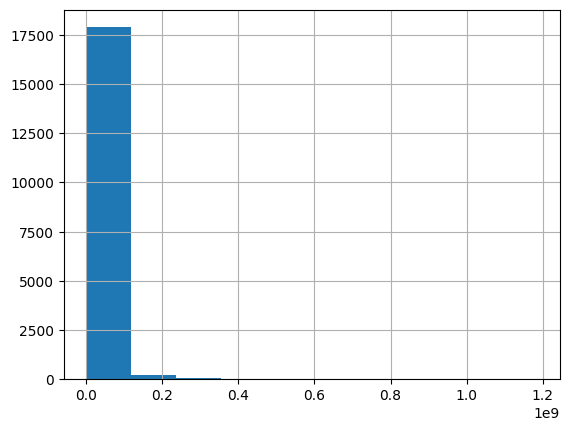

In [48]:
dataset['Value'].hist()

In [49]:
dataset.corr()

C:\Users\xhiib\AppData\Local\Temp\ipykernel_11024\2191645083.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


,Unnamed: 0,ID,Age,Overall,Potential,Value,Special,International Reputation,Weak Foot,Skill Moves,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
Unnamed: 0,1.000000,0.415757,-0.454846,-0.972791,-0.633395,-0.440585,-0.596508,-0.413322,-0.204026,-0.415672,...,-0.337899,-0.716173,-0.280829,-0.248564,-0.220034,0.027757,0.027026,0.030654,0.019842,0.025610
ID,0.415757,1.000000,-0.739208,-0.417025,0.047074,-0.106880,-0.231352,-0.356191,-0.075784,-0.056914,...,-0.140657,-0.384473,-0.110198,-0.085929,-0.068409,-0.105594,-0.111149,-0.106652,-0.118250,-0.105778
Age,-0.454846,-0.739208,1.000000,0.452350,-0.253312,0.058848,0.236695,0.253765,0.059867,0.027649,...,0.139535,0.391023,0.142817,0.119745,0.103089,0.101277,0.106419,0.104964,0.116402,0.103313
Overall,-0.972791,-0.417025,0.452350,1.000000,0.660939,0.499790,0.606960,0.499491,0.212015,0.414463,...,0.341429,0.727655,0.286505,0.252629,0.222811,-0.025937,-0.025062,-0.029372,-0.017674,-0.023276
Potential,-0.633395,0.047074,-0.253312,0.660939,1.000000,0.457905,0.383727,0.372993,0.162346,0.354290,...,0.224281,0.440008,0.162801,0.143564,0.128980,-0.053446,-0.054672,-0.059061,-0.052589,-0.053341
Value,-0.440585,-0.106880,0.058848,0.499790,0.457905,1.000000,0.310190,0.454649,0.134772,0.264022,...,0.194791,0.366372,0.113887,0.094844,0.077349,-0.033054,-0.031571,-0.031964,-0.031807,-0.033406
Special,-0.596508,-0.231352,0.236695,0.606960,0.383727,0.310190,1.000000,0.292208,0.341855,0.763412,...,0.734533,0.752331,0.561866,0.538802,0.506968,-0.674637,-0.673625,-0.670254,-0.668272,-0.673238
International Reputation,-0.413322,-0.356191,0.253765,0.499491,0.372993,0.454649,0.292208,1.000000,0.128317,0.208153,...,0.218620,0.392787,0.115208,0.092846,0.079176,0.004526,0.003942,0.000651,0.006904,0.003444
Weak Foot,-0.204026,-0.075784,0.059867,0.212015,0.162346,0.134772,0.341855,0.128317,1.000000,0.340721,...,0.330252,0.278132,0.065673,0.042646,0.026105,-0.231905,-0.233098,-0.229395,-0.231298,-0.232574
Skill Moves,-0.415672,-0.056914,0.027649,0.414463,0.354290,0.264022,0.763412,0.208153,0.340721,1.000000,...,0.690434,0.586836,0.241428,0.210517,0.178607,-0.621675,-0.619755,-0.616990,-0.618853,-0.621925


In [51]:
dataset['Wage'] = dataset['Wage'].map(lambda x: x.replace('€','')).map(lambda x:  (x.replace('M','000000')) if 'M' in x else x).map(lambda x: (x.replace('K','000')) if 'K' in x else x).map(lambda x: x.replace('.','' if '.' in x else x))


In [52]:
dataset['Wage'] = pd.to_numeric(dataset['Wage'])

In [53]:
dataset.corr()

C:\Users\xhiib\AppData\Local\Temp\ipykernel_11024\2191645083.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


,Unnamed: 0,ID,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
Unnamed: 0,1.000000,0.415757,-0.454846,-0.972791,-0.633395,-0.440585,-0.479719,-0.596508,-0.413322,-0.204026,...,-0.337899,-0.716173,-0.280829,-0.248564,-0.220034,0.027757,0.027026,0.030654,0.019842,0.025610
ID,0.415757,1.000000,-0.739208,-0.417025,0.047074,-0.106880,-0.204610,-0.231352,-0.356191,-0.075784,...,-0.140657,-0.384473,-0.110198,-0.085929,-0.068409,-0.105594,-0.111149,-0.106652,-0.118250,-0.105778
Age,-0.454846,-0.739208,1.000000,0.452350,-0.253312,0.058848,0.141145,0.236695,0.253765,0.059867,...,0.139535,0.391023,0.142817,0.119745,0.103089,0.101277,0.106419,0.104964,0.116402,0.103313
Overall,-0.972791,-0.417025,0.452350,1.000000,0.660939,0.499790,0.571926,0.606960,0.499491,0.212015,...,0.341429,0.727655,0.286505,0.252629,0.222811,-0.025937,-0.025062,-0.029372,-0.017674,-0.023276
Potential,-0.633395,0.047074,-0.253312,0.660939,1.000000,0.457905,0.486413,0.383727,0.372993,0.162346,...,0.224281,0.440008,0.162801,0.143564,0.128980,-0.053446,-0.054672,-0.059061,-0.052589,-0.053341
Value,-0.440585,-0.106880,0.058848,0.499790,0.457905,1.000000,0.623611,0.310190,0.454649,0.134772,...,0.194791,0.366372,0.113887,0.094844,0.077349,-0.033054,-0.031571,-0.031964,-0.031807,-0.033406
Wage,-0.479719,-0.204610,0.141145,0.571926,0.486413,0.623611,1.000000,0.347835,0.668635,0.140849,...,0.222440,0.419597,0.145594,0.126291,0.111025,-0.025595,-0.025177,-0.028325,-0.025489,-0.025992
Special,-0.596508,-0.231352,0.236695,0.606960,0.383727,0.310190,0.347835,1.000000,0.292208,0.341855,...,0.734533,0.752331,0.561866,0.538802,0.506968,-0.674637,-0.673625,-0.670254,-0.668272,-0.673238
International Reputation,-0.413322,-0.356191,0.253765,0.499491,0.372993,0.454649,0.668635,0.292208,1.000000,0.128317,...,0.218620,0.392787,0.115208,0.092846,0.079176,0.004526,0.003942,0.000651,0.006904,0.003444
Weak Foot,-0.204026,-0.075784,0.059867,0.212015,0.162346,0.134772,0.140849,0.341855,0.128317,1.000000,...,0.330252,0.278132,0.065673,0.042646,0.026105,-0.231905,-0.233098,-0.229395,-0.231298,-0.232574


In [55]:
dataset['Body Type'].unique()

array(['Messi', 'C. Ronaldo', 'Neymar', 'Lean', 'Normal', 'Courtois',
       'Stocky', 'PLAYER_BODY_TYPE_25', 'Shaqiri', 'Akinfenwa', nan],
      dtype=object)

In [71]:
dataset['Height'] = dataset['Height'].dropna()

In [74]:
dataset['Height'] = dataset['Height'].map(lambda x: str(x).replace('\'','.'))

In [82]:
dataset = dataset[dataset.Height != 'nan']


In [84]:
dataset['Height'] = pd.to_numeric(dataset['Height'])


C:\Users\xhiib\AppData\Local\Temp\ipykernel_11024\2405651066.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Height'] = pd.to_numeric(dataset['Height'])


In [87]:
dataset.corr()

C:\Users\xhiib\AppData\Local\Temp\ipykernel_11024\2191645083.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


,Unnamed: 0,ID,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
Unnamed: 0,1.000000,0.425665,-0.458646,-0.972721,-0.622001,-0.442746,-0.480170,-0.780630,-0.413603,-0.201108,...,-0.385293,-0.789491,-0.298035,-0.258371,-0.220729,-0.042641,-0.048975,-0.054947,-0.043891,-0.042560
ID,0.425665,1.000000,-0.737009,-0.426057,0.051821,-0.118133,-0.213804,-0.414483,-0.365039,-0.102945,...,-0.261495,-0.470436,-0.200217,-0.168456,-0.138901,-0.059137,-0.072881,-0.072405,-0.069205,-0.064808
Age,-0.458646,-0.737009,1.000000,0.455130,-0.266479,0.064568,0.144643,0.409737,0.257546,0.090444,...,0.248643,0.468334,0.232667,0.205317,0.176894,0.065690,0.072786,0.078639,0.076748,0.078222
Overall,-0.972721,-0.426057,0.455130,1.000000,0.650685,0.505646,0.575584,0.795900,0.501952,0.208897,...,0.390954,0.801772,0.305991,0.264510,0.224896,0.038454,0.045649,0.052155,0.036988,0.040965
Potential,-0.622001,0.051821,-0.266479,0.650685,1.000000,0.458865,0.485540,0.466603,0.368039,0.146337,...,0.229695,0.470241,0.146148,0.121376,0.104583,-0.025787,-0.021723,-0.018139,-0.025419,-0.037122
Value,-0.442746,-0.118133,0.064568,0.505646,0.458865,1.000000,0.623314,0.396136,0.461197,0.131833,...,0.218723,0.399888,0.105003,0.082328,0.061497,0.002229,0.012616,0.019366,0.003804,-0.003177
Wage,-0.480170,-0.213804,0.144643,0.575584,0.485540,0.623314,1.000000,0.451945,0.668056,0.138227,...,0.256148,0.457993,0.146964,0.124009,0.104907,0.006755,0.004341,0.001998,-0.005854,-0.000460
Special,-0.780630,-0.414483,0.409737,0.795900,0.466603,0.396136,0.451945,1.000000,0.406544,0.257149,...,0.513808,0.741974,0.267822,0.252228,0.221075,0.061031,0.065959,0.073891,0.061097,0.061681
International Reputation,-0.413603,-0.365039,0.257546,0.501952,0.368039,0.461197,0.668056,0.406544,1.000000,0.134357,...,0.284888,0.441928,0.134494,0.106935,0.088367,-0.009156,-0.017296,-0.010921,-0.014116,-0.017866
Weak Foot,-0.201108,-0.102945,0.090444,0.208897,0.146337,0.131833,0.138227,0.257149,0.134357,1.000000,...,0.249064,0.226562,-0.101737,-0.121675,-0.133957,0.008527,0.001815,0.002458,0.005289,0.006577


<AxesSubplot: >

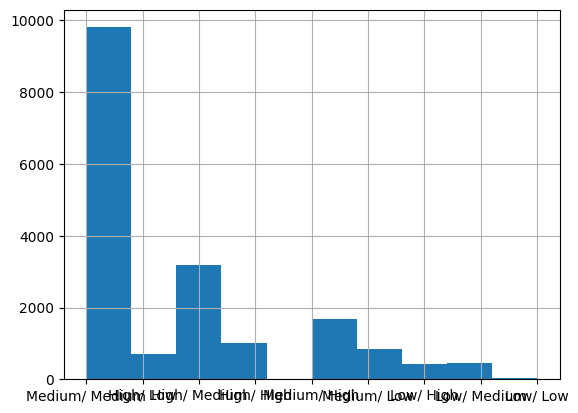

In [5]:
dataset['Work Rate'].hist()

<AxesSubplot: >

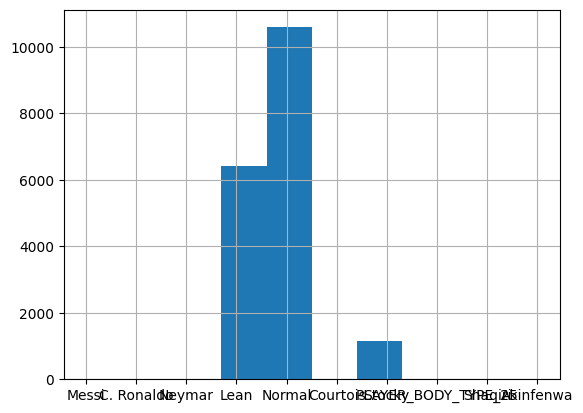

In [6]:
dataset['Body Type'].hist()

In [57]:
dataset['Position'].unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB', nan], dtype=object)

In [59]:
dataset['LW']

0        92+2
1        89+3
2        89+3
3         NaN
4        87+3
         ... 
18202    44+2
18203    39+2
18204    45+2
18205    47+2
18206    45+2
Name: LW, Length: 18207, dtype: object

In [69]:
one_hot_position = pd.get_dummies(dataset['Position'])
one_hot_position['Overall'] = dataset['Overall']
one_hot_position.corr()

,CAM,CB,CDM,CF,CM,LAM,LB,LCB,LCM,LDM,...,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST,Overall
CAM,1.000000,-0.088134,-0.062577,-0.017003,-0.077018,-0.009043,-0.074821,-0.051235,-0.039680,-0.030974,...,-0.051809,-0.039473,-0.031295,-0.007892,-0.068536,-0.028274,-0.038373,-0.018443,-0.098245,0.017017
CB,-0.088134,1.000000,-0.087644,-0.023813,-0.107870,-0.012665,-0.104793,-0.071758,-0.055574,-0.043381,...,-0.072562,-0.055285,-0.043832,-0.011053,-0.095990,-0.039600,-0.053744,-0.025831,-0.137599,-0.073398
CDM,-0.062577,-0.087644,1.000000,-0.016908,-0.076590,-0.008992,-0.074405,-0.050950,-0.039459,-0.030801,...,-0.051521,-0.039254,-0.031122,-0.007848,-0.068155,-0.028117,-0.038160,-0.018341,-0.097699,-0.004777
CF,-0.017003,-0.023813,-0.016908,1.000000,-0.020810,-0.002443,-0.020216,-0.013843,-0.010721,-0.008369,...,-0.013998,-0.010665,-0.008456,-0.002132,-0.018518,-0.007640,-0.010368,-0.004983,-0.026545,-0.006179
CM,-0.077018,-0.107870,-0.076590,-0.020810,1.000000,-0.011068,-0.091576,-0.062708,-0.048565,-0.037910,...,-0.063410,-0.048313,-0.038304,-0.009659,-0.083883,-0.034606,-0.046966,-0.022573,-0.120246,-0.122704
LAM,-0.009043,-0.012665,-0.008992,-0.002443,-0.011068,1.000000,-0.010752,-0.007362,-0.005702,-0.004451,...,-0.007445,-0.005672,-0.004497,-0.001134,-0.009849,-0.004063,-0.005514,-0.002650,-0.014118,0.028740
LB,-0.074821,-0.104793,-0.074405,-0.020216,-0.091576,-0.010752,1.000000,-0.060919,-0.047180,-0.036828,...,-0.061601,-0.046934,-0.037211,-0.009384,-0.081490,-0.033619,-0.045626,-0.021929,-0.116815,-0.025853
LCB,-0.051235,-0.071758,-0.050950,-0.013843,-0.062708,-0.007362,-0.060919,1.000000,-0.032307,-0.025218,...,-0.042182,-0.032139,-0.025481,-0.006425,-0.055801,-0.023021,-0.031243,-0.015016,-0.079990,0.084141
LCM,-0.039680,-0.055574,-0.039459,-0.010721,-0.048565,-0.005702,-0.047180,-0.032307,1.000000,-0.019531,...,-0.032669,-0.024890,-0.019734,-0.004976,-0.043216,-0.017829,-0.024197,-0.011630,-0.061950,0.065867
LDM,-0.030974,-0.043381,-0.030801,-0.008369,-0.037910,-0.004451,-0.036828,-0.025218,-0.019531,1.000000,...,-0.025501,-0.019429,-0.015404,-0.003884,-0.033734,-0.013917,-0.018888,-0.009078,-0.048358,0.047088


In [88]:
len(dataset.columns)


89

In [89]:
for col in dataset.columns:
    print(dataset.dtypes[col])

int64
int64
object
int64
object
object
object
int64
int64
object
object
int64
int64
int64
object
float64
float64
float64
object
object
object
object
float64
object
object
object
float64
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
object


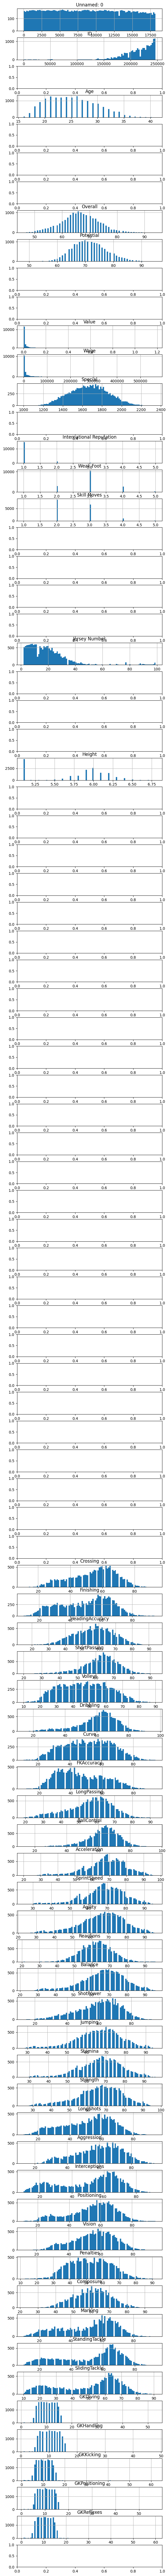

In [90]:
fig, axes = plt.subplots(89, 1, figsize=(7, 124))
for col, axis in zip(dataset.columns, axes):
    if dataset[col].dtypes != 'object':
        dataset.hist(column = col, bins = 100, ax=axis)

In [91]:
dataset.drop(dataset[dataset.Position=='GK'].index, inplace=True)

In [92]:
dataset = dataset.select_dtypes(exclude=['object'])

In [93]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16134 entries, 0 to 18206
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                16134 non-null  int64  
 1   ID                        16134 non-null  int64  
 2   Age                       16134 non-null  int64  
 3   Overall                   16134 non-null  int64  
 4   Potential                 16134 non-null  int64  
 5   Value                     16134 non-null  int64  
 6   Wage                      16134 non-null  int64  
 7   Special                   16134 non-null  int64  
 8   International Reputation  16134 non-null  float64
 9   Weak Foot                 16134 non-null  float64
 10  Skill Moves               16134 non-null  float64
 11  Jersey Number             16122 non-null  float64
 12  Height                    16134 non-null  float64
 13  Crossing                  16134 non-null  float64
 14  Finish

In [129]:
dataset.drop(dataset.loc[:, 'Unnamed: 0':'ID'].columns, inplace=True, axis = 1)

In [94]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16134 entries, 0 to 18206
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                16134 non-null  int64  
 1   ID                        16134 non-null  int64  
 2   Age                       16134 non-null  int64  
 3   Overall                   16134 non-null  int64  
 4   Potential                 16134 non-null  int64  
 5   Value                     16134 non-null  int64  
 6   Wage                      16134 non-null  int64  
 7   Special                   16134 non-null  int64  
 8   International Reputation  16134 non-null  float64
 9   Weak Foot                 16134 non-null  float64
 10  Skill Moves               16134 non-null  float64
 11  Jersey Number             16122 non-null  float64
 12  Height                    16134 non-null  float64
 13  Crossing                  16134 non-null  float64
 14  Finish

Then, we remove the goal keepers.

In [95]:
dataset.drop(dataset.loc[:, 'GKDiving':'GKReflexes'].columns, inplace=True, axis = 1)

In [97]:
dataset[:10]

,Unnamed: 0,ID,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,0,158023,31,94,94,1105000000,565000,2202,5.0,4.0,...,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0
1,1,20801,33,94,94,77000000,405000,2228,5.0,4.0,...,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0
2,2,190871,26,92,93,1185000000,290000,2143,5.0,5.0,...,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0
4,4,192985,27,91,92,102000000,355000,2281,4.0,5.0,...,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0
5,5,183277,27,91,91,93000000,340000,2142,4.0,4.0,...,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0
6,6,177003,32,91,91,67000000,420000,2280,4.0,4.0,...,82.0,62.0,83.0,79.0,92.0,82.0,84.0,60.0,76.0,73.0
7,7,176580,31,91,91,80000000,455000,2346,5.0,4.0,...,85.0,87.0,41.0,92.0,84.0,85.0,85.0,62.0,45.0,38.0
8,8,155862,32,91,91,51000000,380000,2201,4.0,3.0,...,59.0,88.0,90.0,60.0,63.0,75.0,82.0,87.0,92.0,91.0
10,10,188545,29,90,90,77000000,205000,2152,4.0,4.0,...,84.0,80.0,39.0,91.0,77.0,88.0,86.0,34.0,42.0,19.0
11,11,182521,28,90,90,765000000,355000,2190,4.0,5.0,...,92.0,60.0,82.0,79.0,86.0,73.0,85.0,72.0,79.0,69.0


In [98]:
dataset[-10:]

,Unnamed: 0,ID,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
18196,18196,238477,19,47,61,60000,1000,1333,1.0,3.0,...,30.0,55.0,44.0,28.0,51.0,44.0,35.0,41.0,44.0,54.0
18197,18197,246167,18,47,61,60000,1000,1362,1.0,3.0,...,37.0,37.0,28.0,39.0,48.0,49.0,52.0,41.0,47.0,38.0
18199,18199,244677,18,47,69,70000,1000,1303,1.0,3.0,...,30.0,53.0,49.0,35.0,40.0,36.0,40.0,48.0,49.0,49.0
18200,18200,231381,18,47,62,60000,1000,1203,1.0,2.0,...,51.0,26.0,16.0,46.0,37.0,58.0,50.0,15.0,17.0,14.0
18201,18201,243413,18,47,68,60000,1000,1098,1.0,3.0,...,16.0,44.0,45.0,20.0,31.0,38.0,43.0,44.0,47.0,53.0
18202,18202,238813,19,47,65,60000,1000,1307,1.0,2.0,...,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0
18203,18203,243165,19,47,63,60000,1000,1098,1.0,2.0,...,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0
18204,18204,241638,16,47,67,60000,1000,1189,1.0,3.0,...,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0
18205,18205,246268,17,47,66,60000,1000,1228,1.0,3.0,...,34.0,33.0,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0
18206,18206,246269,16,46,66,60000,1000,1321,1.0,3.0,...,32.0,56.0,42.0,34.0,49.0,33.0,43.0,40.0,43.0,50.0


**Second Step:** find out whether or not there are missing values and remove the least influential attributes. 

In [99]:
{att : dataset[dataset[att].isnull()].shape[0] for att in dataset.columns}

{'Unnamed: 0': 0,
 'ID': 0,
 'Age': 0,
 'Overall': 0,
 'Potential': 0,
 'Value': 0,
 'Wage': 0,
 'Special': 0,
 'International Reputation': 0,
 'Weak Foot': 0,
 'Skill Moves': 0,
 'Jersey Number': 12,
 'Height': 0,
 'Crossing': 0,
 'Finishing': 0,
 'HeadingAccuracy': 0,
 'ShortPassing': 0,
 'Volleys': 0,
 'Dribbling': 0,
 'Curve': 0,
 'FKAccuracy': 0,
 'LongPassing': 0,
 'BallControl': 0,
 'Acceleration': 0,
 'SprintSpeed': 0,
 'Agility': 0,
 'Reactions': 0,
 'Balance': 0,
 'ShotPower': 0,
 'Jumping': 0,
 'Stamina': 0,
 'Strength': 0,
 'LongShots': 0,
 'Aggression': 0,
 'Interceptions': 0,
 'Positioning': 0,
 'Vision': 0,
 'Penalties': 0,
 'Composure': 0,
 'Marking': 0,
 'StandingTackle': 0,
 'SlidingTackle': 0}

Since we have enough data, we remove all rows with missing values in any attribute

In [100]:
dataset.dropna (inplace=True)
{att : dataset[dataset[att].isnull()].shape[0] for att in dataset.columns}

{'Unnamed: 0': 0,
 'ID': 0,
 'Age': 0,
 'Overall': 0,
 'Potential': 0,
 'Value': 0,
 'Wage': 0,
 'Special': 0,
 'International Reputation': 0,
 'Weak Foot': 0,
 'Skill Moves': 0,
 'Jersey Number': 0,
 'Height': 0,
 'Crossing': 0,
 'Finishing': 0,
 'HeadingAccuracy': 0,
 'ShortPassing': 0,
 'Volleys': 0,
 'Dribbling': 0,
 'Curve': 0,
 'FKAccuracy': 0,
 'LongPassing': 0,
 'BallControl': 0,
 'Acceleration': 0,
 'SprintSpeed': 0,
 'Agility': 0,
 'Reactions': 0,
 'Balance': 0,
 'ShotPower': 0,
 'Jumping': 0,
 'Stamina': 0,
 'Strength': 0,
 'LongShots': 0,
 'Aggression': 0,
 'Interceptions': 0,
 'Positioning': 0,
 'Vision': 0,
 'Penalties': 0,
 'Composure': 0,
 'Marking': 0,
 'StandingTackle': 0,
 'SlidingTackle': 0}

In [101]:
dataset.shape

(16122, 42)

In [102]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16122 entries, 0 to 18206
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                16122 non-null  int64  
 1   ID                        16122 non-null  int64  
 2   Age                       16122 non-null  int64  
 3   Overall                   16122 non-null  int64  
 4   Potential                 16122 non-null  int64  
 5   Value                     16122 non-null  int64  
 6   Wage                      16122 non-null  int64  
 7   Special                   16122 non-null  int64  
 8   International Reputation  16122 non-null  float64
 9   Weak Foot                 16122 non-null  float64
 10  Skill Moves               16122 non-null  float64
 11  Jersey Number             16122 non-null  float64
 12  Height                    16122 non-null  float64
 13  Crossing                  16122 non-null  float64
 14  Finish

The **correlation matrix** permits to visualize dependencies between pairs of attributes: values close to -1 or +1 indicate a high correlation. A negative correlation value means than when the value of an attribute gets high, the value of the other attribute decreases, and vice-versa. Positive correlation values point out that both features increase or decrease simultaneously. 

In [9]:
dataset.corr()

C:\Users\xhiib\AppData\Local\Temp\ipykernel_14824\2191645083.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
Unnamed: 0,1.000000,0.415757,-0.454846,-0.972791,-0.633395,-0.596508,-0.413322,-0.204026,-0.415672,0.213645,...,-0.337899,-0.716173,-0.280829,-0.248564,-0.220034,0.027757,0.027026,0.030654,0.019842,0.025610
ID,0.415757,1.000000,-0.739208,-0.417025,0.047074,-0.231352,-0.356191,-0.075784,-0.056914,0.182074,...,-0.140657,-0.384473,-0.110198,-0.085929,-0.068409,-0.105594,-0.111149,-0.106652,-0.118250,-0.105778
Age,-0.454846,-0.739208,1.000000,0.452350,-0.253312,0.236695,0.253765,0.059867,0.027649,-0.241156,...,0.139535,0.391023,0.142817,0.119745,0.103089,0.101277,0.106419,0.104964,0.116402,0.103313
Overall,-0.972791,-0.417025,0.452350,1.000000,0.660939,0.606960,0.499491,0.212015,0.414463,-0.218931,...,0.341429,0.727655,0.286505,0.252629,0.222811,-0.025937,-0.025062,-0.029372,-0.017674,-0.023276
Potential,-0.633395,0.047074,-0.253312,0.660939,1.000000,0.383727,0.372993,0.162346,0.354290,-0.010474,...,0.224281,0.440008,0.162801,0.143564,0.128980,-0.053446,-0.054672,-0.059061,-0.052589,-0.053341
Special,-0.596508,-0.231352,0.236695,0.606960,0.383727,1.000000,0.292208,0.341855,0.763412,-0.133716,...,0.734533,0.752331,0.561866,0.538802,0.506968,-0.674637,-0.673625,-0.670254,-0.668272,-0.673238
International Reputation,-0.413322,-0.356191,0.253765,0.499491,0.372993,0.292208,1.000000,0.128317,0.208153,-0.077298,...,0.218620,0.392787,0.115208,0.092846,0.079176,0.004526,0.003942,0.000651,0.006904,0.003444
Weak Foot,-0.204026,-0.075784,0.059867,0.212015,0.162346,0.341855,0.128317,1.000000,0.340721,-0.035410,...,0.330252,0.278132,0.065673,0.042646,0.026105,-0.231905,-0.233098,-0.229395,-0.231298,-0.232574
Skill Moves,-0.415672,-0.056914,0.027649,0.414463,0.354290,0.763412,0.208153,0.340721,1.000000,-0.035194,...,0.690434,0.586836,0.241428,0.210517,0.178607,-0.621675,-0.619755,-0.616990,-0.618853,-0.621925
Jersey Number,0.213645,0.182074,-0.241156,-0.218931,-0.010474,-0.133716,-0.077298,-0.035410,-0.035194,1.000000,...,-0.028023,-0.167523,-0.142474,-0.133285,-0.124610,0.004807,0.001543,0.001162,-0.002736,0.003255


In [10]:
import matplotlib.pyplot as plt
corr = dataset.corr()
corr.style.background_gradient(cmap='coolwarm')

C:\Users\xhiib\AppData\Local\Temp\ipykernel_14824\3654307241.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataset.corr()


,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
Unnamed: 0,1.000000,0.415757,-0.454846,-0.972791,-0.633395,-0.596508,-0.413322,-0.204026,-0.415672,0.213645,-0.390062,-0.325529,-0.337766,-0.492495,-0.384285,-0.364106,-0.416378,-0.395433,-0.477500,-0.449655,-0.185030,-0.198797,-0.256270,-0.832156,-0.097160,-0.440023,-0.261581,-0.358451,-0.342839,-0.417853,-0.397067,-0.319162,-0.351820,-0.490296,-0.337899,-0.716173,-0.280829,-0.248564,-0.220034,0.027757,0.027026,0.030654,0.019842,0.025610
ID,0.415757,1.000000,-0.739208,-0.417025,0.047074,-0.231352,-0.356191,-0.075784,-0.056914,0.182074,-0.131994,-0.082323,-0.106815,-0.136279,-0.159915,-0.030340,-0.169511,-0.199549,-0.186764,-0.100184,0.133236,0.132437,-0.019897,-0.408617,0.048463,-0.166133,-0.169369,-0.053895,-0.259756,-0.161549,-0.228329,-0.160602,-0.088330,-0.215170,-0.140657,-0.384473,-0.110198,-0.085929,-0.068409,-0.105594,-0.111149,-0.106652,-0.118250,-0.105778
Age,-0.454846,-0.739208,1.000000,0.452350,-0.253312,0.236695,0.253765,0.059867,0.027649,-0.241156,0.130545,0.068660,0.147183,0.132894,0.142472,0.010166,0.143276,0.193467,0.181310,0.084969,-0.158667,-0.151682,-0.019395,0.453124,-0.089877,0.156947,0.177167,0.097793,0.332798,0.155096,0.265190,0.197845,0.082443,0.187422,0.139535,0.391023,0.142817,0.119745,0.103089,0.101277,0.106419,0.104964,0.116402,0.103313
Overall,-0.972791,-0.417025,0.452350,1.000000,0.660939,0.606960,0.499491,0.212015,0.414463,-0.218931,0.394972,0.332515,0.340776,0.502550,0.391338,0.372426,0.419491,0.396892,0.483909,0.460197,0.196869,0.210647,0.264952,0.850045,0.103160,0.441118,0.264435,0.365656,0.349326,0.420795,0.395470,0.321326,0.356493,0.498894,0.341429,0.727655,0.286505,0.252629,0.222811,-0.025937,-0.025062,-0.029372,-0.017674,-0.023276
Potential,-0.633395,0.047074,-0.253312,0.660939,1.000000,0.383727,0.372993,0.162346,0.354290,-0.010474,0.246319,0.243355,0.200988,0.369189,0.254906,0.315019,0.279944,0.230544,0.321437,0.354396,0.234608,0.236771,0.222310,0.513425,0.138025,0.288318,0.109151,0.202563,0.075769,0.266740,0.171174,0.154908,0.245616,0.348141,0.224281,0.440008,0.162801,0.143564,0.128980,-0.053446,-0.054672,-0.059061,-0.052589,-0.053341
Special,-0.596508,-0.231352,0.236695,0.606960,0.383727,1.000000,0.292208,0.341855,0.763412,-0.133716,0.866417,0.724244,0.644421,0.906729,0.773974,0.874274,0.851900,0.806414,0.846302,0.912107,0.654337,0.645963,0.699673,0.597169,0.586788,0.835277,0.321846,0.792762,0.192990,0.840049,0.666236,0.561676,0.824307,0.761992,0.734533,0.752331,0.561866,0.538802,0.506968,-0.674637,-0.673625,-0.670254,-0.668272,-0.673238
International Reputation,-0.413322,-0.356191,0.253765,0.499491,0.372993,0.292208,1.000000,0.128317,0.208153,-0.077298,0.191770,0.178373,0.157483,0.242803,0.243089,0.179041,0.233681,0.223564,0.239525,0.217946,0.044319,0.044070,0.100869,0.445614,0.050076,0.227772,0.120931,0.094780,0.131280,0.213960,0.173327,0.129586,0.183003,0.284600,0.218620,0.392787,0.115208,0.092846,0.079176,0.004526,0.003942,0.000651,0.006904,0.003444
Weak Foot,-0.204026,-0.075784,0.059867,0.212015,0.162346,0.341855,0.128317,1.000000,0.340721,-0.035410,0.307925,0.357416,0.183238,0.322133,0.357340,0.352658,0.345468,0.330472,0.277174,0.356383,0.261435,0.248822,0.302062,0.201341,0.254022,0.332855,0.069752,0.232094,-0.008470,0.355967,0.131524,0.053097,0.346896,0.337897,0.330252,0.278132,0.065673,0.042646,0.026105,-0.231905,-0.233098,-0.229395,-0.231298,-0.232574
Skill Moves,-0.415672,-0.056914,0.027649,0.414463,0.354290,0.763412,0.208153,0.340721,1.000000,-0.035194,0.741035,0.743439,0.443005,0.730363,0.745077,0.839757,0.771052,0.7

In [42]:
dataset[:10]

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,94,94,2202,5.0,4.0,4.0,10.0,84.0,95.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,94,94,2228,5.0,4.0,5.0,7.0,84.0,94.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,92,93,2143,5.0,5.0,5.0,10.0,79.0,87.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,91,93,1471,4.0,3.0,1.0,1.0,17.0,13.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,91,92,2281,4.0,5.0,4.0,7.0,93.0,82.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
5,27,91,91,2142,4.0,4.0,4.0,10.0,81.0,84.0,...,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0
6,32,91,91,2280,4.0,4.0,4.0,10.0,86.0,72.0,...,82.0,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0
7,31,91,91,2346,5.0,4.0,3.0,9.0,77.0,93.0,...,85.0,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0
8,32,91,91,2201,4.0,3.0,3.0,15.0,66.0,60.0,...,75.0,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0
9,25,90,93,1331,3.0,3.0,1.0,1.0,13.0,11.0,...,11.0,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0


We remove "Position" and those attributes with a correlation value less than 0.4, assuming that they do not excessively influence the overall value. 

In [61]:
"""dataset.drop(['Finishing'], inplace=True, axis = 1)
dataset.drop(dataset.loc[:, 'Acceleration':'Agility'].columns, inplace=True, axis = 1)
dataset.drop(['Balance'], inplace=True, axis = 1)
dataset.drop(['Jumping'], inplace=True, axis = 1)
dataset.drop(['Strength'], inplace=True, axis = 1)
dataset.drop(['Interceptions'], inplace=True, axis = 1)
dataset.drop(['Penalties'], inplace=True, axis = 1)
dataset.drop(dataset.loc[:, 'Marking':'SlidingTackle'].columns, inplace=True, axis = 1)"""

In [104]:
dataset.info()
dataset.drop(['Unnamed: 0'], inplace=True, axis = 1)
dataset.drop(['ID'], inplace=True, axis = 1)
dataset.drop(['Height'], inplace=True, axis = 1)
dataset.drop(['Jersey Number'], inplace=True, axis = 1)





<class 'pandas.core.frame.DataFrame'>
Int64Index: 16122 entries, 0 to 18206
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                16122 non-null  int64  
 1   ID                        16122 non-null  int64  
 2   Age                       16122 non-null  int64  
 3   Overall                   16122 non-null  int64  
 4   Potential                 16122 non-null  int64  
 5   Value                     16122 non-null  int64  
 6   Wage                      16122 non-null  int64  
 7   Special                   16122 non-null  int64  
 8   International Reputation  16122 non-null  float64
 9   Weak Foot                 16122 non-null  float64
 10  Skill Moves               16122 non-null  float64
 11  Jersey Number             16122 non-null  float64
 12  Height                    16122 non-null  float64
 13  Crossing                  16122 non-null  float64
 14  Finish

In [105]:
dataset.shape

(16122, 38)

In [106]:
len(np.where((dataset['Potential'] == dataset['Overall']))[0]) - dataset.shape[0]

-10625

**Third Step:** shuffle the dataset (three times).

In [107]:
dataset=dataset.sample(frac=1) #frac is the fraction of axis items to return. 1 means all of them
dataset=dataset.sample(frac=1)
dataset=dataset.sample(frac=1).reset_index(drop=True) #Reset index and drop the old one
dataset.head()

,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Crossing,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,29,70,70,13000000,22000,1841,1.0,3.0,2.0,73.0,...,66.0,57.0,68.0,61.0,62.0,50.0,64.0,68.0,72.0,70.0
1,21,57,71,230000,1000,1561,1.0,3.0,2.0,42.0,...,52.0,68.0,48.0,52.0,58.0,36.0,62.0,40.0,53.0,41.0
2,21,58,66,190000,1000,1519,1.0,3.0,2.0,44.0,...,52.0,40.0,47.0,47.0,59.0,49.0,51.0,52.0,51.0,50.0
3,28,65,65,550000,2000,1612,1.0,3.0,3.0,57.0,...,59.0,32.0,38.0,63.0,52.0,68.0,57.0,31.0,33.0,38.0
4,20,55,64,120000,2000,1250,1.0,3.0,2.0,30.0,...,24.0,50.0,52.0,33.0,35.0,39.0,38.0,53.0,63.0,61.0


**Fourth step:** The problem consists on classifying football players depending on their overall score (quality) into four categories: Poor, Intermediate, Good, and Excellent. We use a quatile-based discretization function to perform this task.  

In [108]:
labels = pd.qcut(dataset["Overall"],4,labels=False)

In [109]:
dataset.insert (1,"Quality",labels)
dataset[:10]

,Age,Quality,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,29,2,70,70,13000000,22000,1841,1.0,3.0,2.0,...,66.0,57.0,68.0,61.0,62.0,50.0,64.0,68.0,72.0,70.0
1,21,0,57,71,230000,1000,1561,1.0,3.0,2.0,...,52.0,68.0,48.0,52.0,58.0,36.0,62.0,40.0,53.0,41.0
2,21,0,58,66,190000,1000,1519,1.0,3.0,2.0,...,52.0,40.0,47.0,47.0,59.0,49.0,51.0,52.0,51.0,50.0
3,28,1,65,65,550000,2000,1612,1.0,3.0,3.0,...,59.0,32.0,38.0,63.0,52.0,68.0,57.0,31.0,33.0,38.0
4,20,0,55,64,120000,2000,1250,1.0,3.0,2.0,...,24.0,50.0,52.0,33.0,35.0,39.0,38.0,53.0,63.0,61.0
5,24,1,65,70,725000,2000,1559,1.0,3.0,3.0,...,50.0,36.0,21.0,70.0,39.0,62.0,59.0,29.0,16.0,19.0
6,28,1,64,64,375000,3000,1539,1.0,3.0,2.0,...,23.0,81.0,54.0,42.0,54.0,39.0,50.0,57.0,60.0,63.0
7,24,3,72,77,42000000,30000,1580,1.0,3.0,3.0,...,61.0,71.0,37.0,73.0,48.0,71.0,67.0,17.0,18.0,11.0
8,22,2,67,75,11000000,2000,1821,1.0,3.0,3.0,...,58.0,57.0,60.0,62.0,66.0,47.0,60.0,63.0,64.0,60.0
9,21,0,53,63,100000,2000,1354,1.0,2.0,2.0,...,47.0,27.0,19.0,45.0,53.0,57.0,45.0,23.0,13.0,15.0


Calculating the *Overall* intervals for each label.

In [110]:
intervals={label : [(dataset.loc[dataset["Quality"]==label].min()["Overall"]),
                    (dataset.loc[dataset["Quality"]==label].max()["Overall"])]
                    for label in range(4)}
intervals

{0: [46.0, 62.0], 1: [63.0, 66.0], 2: [67.0, 71.0], 3: [72.0, 94.0]}

The number of instances per label should be balanced.

In [111]:
dataset["Quality"].value_counts()

2    4353
0    4296
1    3868
3    3605
Name: Quality, dtype: int64

In [112]:
interval_names = [str(interval) for interval in intervals.values()]
interval_names[0]="Poor:"+interval_names[0]
interval_names[1]="Interm:"+interval_names[1]
interval_names[2]="Good:"+interval_names[2]
interval_names[3]="Excel:"+interval_names[3]
interval_names

['Poor:[46.0, 62.0]',
 'Interm:[63.0, 66.0]',
 'Good:[67.0, 71.0]',
 'Excel:[72.0, 94.0]']

In [113]:
dataset.drop(columns="Overall", inplace=True)
dataset[:10]

,Age,Quality,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Crossing,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,29,2,70,13000000,22000,1841,1.0,3.0,2.0,73.0,...,66.0,57.0,68.0,61.0,62.0,50.0,64.0,68.0,72.0,70.0
1,21,0,71,230000,1000,1561,1.0,3.0,2.0,42.0,...,52.0,68.0,48.0,52.0,58.0,36.0,62.0,40.0,53.0,41.0
2,21,0,66,190000,1000,1519,1.0,3.0,2.0,44.0,...,52.0,40.0,47.0,47.0,59.0,49.0,51.0,52.0,51.0,50.0
3,28,1,65,550000,2000,1612,1.0,3.0,3.0,57.0,...,59.0,32.0,38.0,63.0,52.0,68.0,57.0,31.0,33.0,38.0
4,20,0,64,120000,2000,1250,1.0,3.0,2.0,30.0,...,24.0,50.0,52.0,33.0,35.0,39.0,38.0,53.0,63.0,61.0
5,24,1,70,725000,2000,1559,1.0,3.0,3.0,35.0,...,50.0,36.0,21.0,70.0,39.0,62.0,59.0,29.0,16.0,19.0
6,28,1,64,375000,3000,1539,1.0,3.0,2.0,53.0,...,23.0,81.0,54.0,42.0,54.0,39.0,50.0,57.0,60.0,63.0
7,24,3,77,42000000,30000,1580,1.0,3.0,3.0,38.0,...,61.0,71.0,37.0,73.0,48.0,71.0,67.0,17.0,18.0,11.0
8,22,2,75,11000000,2000,1821,1.0,3.0,3.0,60.0,...,58.0,57.0,60.0,62.0,66.0,47.0,60.0,63.0,64.0,60.0
9,21,0,63,100000,2000,1354,1.0,2.0,2.0,52.0,...,47.0,27.0,19.0,45.0,53.0,57.0,45.0,23.0,13.0,15.0


**Fifth Step:** split the dataset vertically into attributes $x$ and label $t$ for supervised learning.

In [114]:
discretized_t = pd.DataFrame(data=dataset["Quality"].values,columns=["Quality"])
discretized_t[:10]

,Quality
0,2
1,0
2,0
3,1
4,0
5,1
6,1
7,3
8,2
9,0


In [115]:
x = dataset.drop (columns="Quality")
x.head()

,Age,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,29,70,13000000,22000,1841,1.0,3.0,2.0,73.0,61.0,...,66.0,57.0,68.0,61.0,62.0,50.0,64.0,68.0,72.0,70.0
1,21,71,230000,1000,1561,1.0,3.0,2.0,42.0,41.0,...,52.0,68.0,48.0,52.0,58.0,36.0,62.0,40.0,53.0,41.0
2,21,66,190000,1000,1519,1.0,3.0,2.0,44.0,46.0,...,52.0,40.0,47.0,47.0,59.0,49.0,51.0,52.0,51.0,50.0
3,28,65,550000,2000,1612,1.0,3.0,3.0,57.0,64.0,...,59.0,32.0,38.0,63.0,52.0,68.0,57.0,31.0,33.0,38.0
4,20,64,120000,2000,1250,1.0,3.0,2.0,30.0,26.0,...,24.0,50.0,52.0,33.0,35.0,39.0,38.0,53.0,63.0,61.0


**Sixth Step:** one-hot encoding of labels (target values).

In [116]:
encoder = OneHotEncoder(categories="auto") # Function that one-hot encoders integers
one_hot_t = encoder.fit_transform(discretized_t.values.reshape(-1,1)).toarray()
one_hot_t[:10]

array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.]])

In [117]:
one_hot_t = pd.DataFrame(data=one_hot_t,columns=interval_names)
one_hot_t[:10]

,"Poor:[46.0, 62.0]","Interm:[63.0, 66.0]","Good:[67.0, 71.0]","Excel:[72.0, 94.0]"
0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0
6,0.0,1.0,0.0,0.0
7,0.0,0.0,0.0,1.0
8,0.0,0.0,1.0,0.0
9,1.0,0.0,0.0,0.0


**Seventh Step:** Standardization or Normalization of the input dataset. *Standardization* is much less affected by outliers, but it does not bound values to a specific range, which may be a problem for neural networks. The center is the mean, and the data is scaled to unit variance. On the other hand, *max-min scaling* ranges the data within max and min values, usually -1, and 1 or \[0,1\].  

In [118]:
x = pd.DataFrame (minmax_scale (x, feature_range=(-1,1)),columns=x.columns)
#x = pd.DataFrame (scale (x),columns=x.columns)
x[:10]

,Age,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,0.04,-0.063830,-0.978059,-0.922124,0.249629,-1.0,0.0,-1.000000,0.512195,0.200000,...,0.325301,0.073171,0.414634,0.190476,0.219512,-0.050,0.135135,0.380952,0.493976,0.481481
1,-0.60,-0.021277,-0.999612,-0.996460,-0.166419,-1.0,0.0,-1.000000,-0.243902,-0.270588,...,-0.012048,0.341463,-0.073171,-0.023810,0.121951,-0.400,0.081081,-0.285714,0.036145,-0.234568
2,-0.60,-0.234043,-0.999679,-0.996460,-0.228826,-1.0,0.0,-1.000000,-0.195122,-0.152941,...,-0.012048,-0.341463,-0.097561,-0.142857,0.146341,-0.075,-0.216216,0.000000,-0.012048,-0.012346
3,-0.04,-0.276596,-0.999072,-0.992920,-0.090639,-1.0,0.0,-0.333333,0.121951,0.270588,...,0.156627,-0.536585,-0.317073,0.238095,-0.024390,0.400,-0.054054,-0.500000,-0.445783,-0.308642
4,-0.68,-0.319149,-0.999797,-0.992920,-0.628529,-1.0,0.0,-1.000000,-0.536585,-0.623529,...,-0.686747,-0.097561,0.024390,-0.476190,-0.439024,-0.325,-0.567568,0.023810,0.277108,0.259259
5,-0.36,-0.063830,-0.998776,-0.992920,-0.169391,-1.0,0.0,-0.333333,-0.414634,0.435294,...,-0.060241,-0.439024,-0.731707,0.404762,-0.341463,0.250,0.000000,-0.547619,-0.855422,-0.777778
6,-0.04,-0.319149,-0.999367,-0.989381,-0.199108,-1.0,0.0,-1.000000,0.024390,-0.435294,...,-0.710843,0.658537,0.073171,-0.261905,0.024390,-0.325,-0.243243,0.119048,0.204819,0.308642
7,-0.36,0.234043,-0.929114,-0.893805,-0.138187,-1.0,0.0,-0.333333,-0.341463,0.435294,...,0.204819,0.414634,-0.341463,0.476190,-0.121951,0.475,0.216216,-0.833333,-0.807229,-0.975309
8,-0.52,0.148936,-0.981435,-0.992920,0.219911,-1.0,0.0,-0.333333,0.195122,0.082353,...,0.132530,0.073171,0.219512,0.214286,0.317073,-0.125,0.027027,0.261905,0.301205,0.234568
9,-0.60,-0.361702,-0.999831,-0.992920,-0.473997,-1.0,-0.5,-1.000000,0.000000,0.011765,...,-0.132530,-0.658537,-0.780488,-0.190476,0.000000,0.125,-0.378378,-0.690476,-0.927711,-0.876543


<AxesSubplot: >

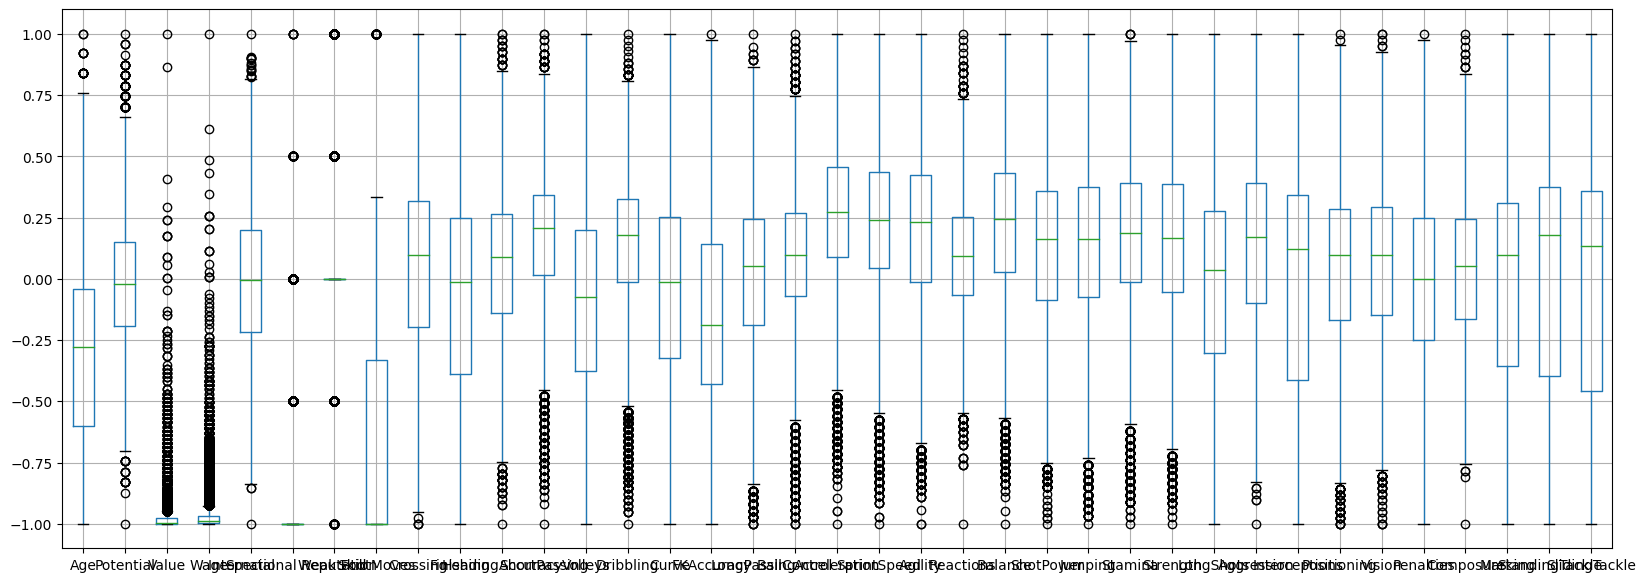

In [119]:
x.boxplot(figsize=(20,7))

An example of representing just one attribute

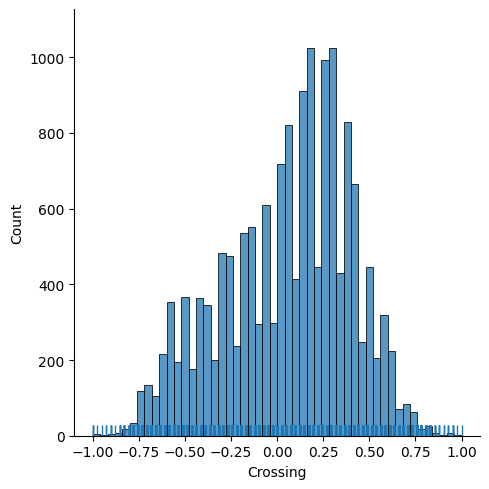

In [120]:
sns.displot(x["Crossing"],kde=False,rug=True)

<AxesSubplot: >

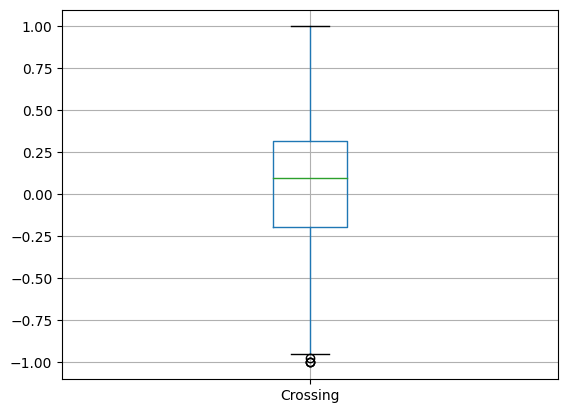

In [121]:
x.boxplot(column=["Crossing"])

In [122]:
x.describe()

,Age,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
count,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,...,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000
mean,-0.279578,0.000665,-0.975720,-0.964141,-0.008453,-0.942253,0.002295,-0.644999,0.053537,-0.064418,...,-0.025506,0.136145,-0.013976,0.043417,0.060219,0.003275,0.036497,-0.016356,0.010054,-0.021365
std,0.363768,0.258486,0.069463,0.079938,0.291911,0.198271,0.318458,0.411882,0.344606,0.385352,...,0.379027,0.352347,0.458493,0.349409,0.314939,0.312770,0.274291,0.409949,0.461961,0.473324
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.600000,-0.191489,-0.999409,-0.996460,-0.218425,-1.000000,0.000000,-1.000000,-0.195122,-0.388235,...,-0.301205,-0.097561,-0.414634,-0.166667,-0.146341,-0.250000,-0.162162,-0.357143,-0.397590,-0.456790
50%,-0.280000,-0.021277,-0.998776,-0.989381,-0.004458,-1.000000,0.000000,-1.000000,0.097561,-0.011765,...,0.036145,0.170732,0.121951,0.095238,0.097561,0.000000,0.054054,0.095238,0.180723,0.135802
75%,-0.040000,0.148936,-0.978059,-0.968142,0.197251,-1.000000,0.000000,-0.333333,0.317073,0.247059,...,0.277108,0.390244,0.341463,0.285714,0.292683,0.250000,0.243243,0.309524,0.373494,0.358025
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Saving** attributes matrix *x* and target labels *t*  to csv files.

In [123]:
x.to_csv (ATT_FILE_NAME, index=False)
one_hot_t.to_csv(ONE_HOT_ENCODED_CLASSES_FILE_NAME, index=False)